# 1. Kernel Density Estimate

Produce a KDE for a given distribution (by hand, not using seaborn!):

Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation


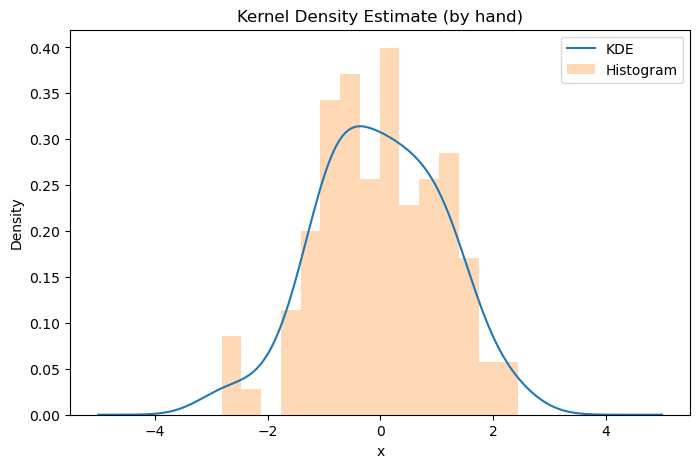

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Generate normally distributed data
N = 100                  # number of data points
mu = 0                   # mean
sigma = 1                # standard deviation

x = np.random.normal(mu, sigma, N)


#plt.hist(x)

# 2️⃣ Define points where we want to evaluate the KDE
x_eval = np.linspace(-5, 5, 200)  # 200 points from -5 to 5

# 3️⃣ Choose bandwidth (controls smoothness)
h = 0.5

# 4️⃣ Compute KDE by hand
kde = np.zeros_like(x_eval)

for xi in x:
    kde += np.exp(-(x_eval - xi)**2 / (2*h**2))  # Gaussian kernel

kde /= (N * h * np.sqrt(2*np.pi))  # normalize

# 5️⃣ Plot the result
plt.figure(figsize=(8,5))
plt.plot(x_eval, kde, label='KDE')
plt.hist(x, bins=15, density=True, alpha=0.3, label='Histogram')  # optional, to compare
plt.title('Kernel Density Estimate (by hand)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()



(array([ 3.,  1.,  5., 18., 17., 19., 12., 15.,  6.,  4.]),
 array([-2.81456412, -2.28871038, -1.76285664, -1.23700289, -0.71114915,
        -0.18529541,  0.34055834,  0.86641208,  1.39226582,  1.91811957,
         2.44397331]),
 <BarContainer object of 10 artists>)

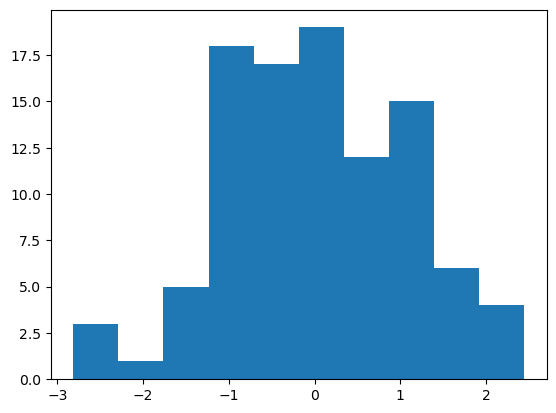

In [17]:
#plt.hist(x)


# 1.1 Fill an histogram in pyplot taking properly care about the aesthetic:

a) use a meaningful number of bins
b) set a proper y axis label
c) set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
d) display the histograms as data points with errors (the error being the poisson uncertainty)

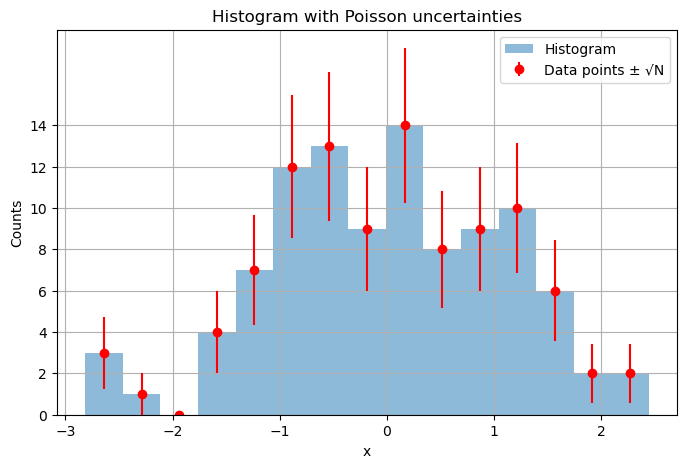

In [21]:


import numpy as np
import matplotlib.pyplot as plt

# Assume x is already defined
# x = np.random.normal(mu, sigma, N)

# 1. Choose number of bins
num_bins = 15  # meaningful choice for 100 points

# 2. Create histogram
counts, bin_edges = np.histogram(x, bins=num_bins)

# 3. Compute Poisson error (sqrt of counts)
errors = np.sqrt(counts)

# 4. Compute bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 5. Plot histogram as bars
plt.figure(figsize=(8,5))
plt.bar(bin_centers, counts, width=bin_edges[1]-bin_edges[0], alpha=0.5, label='Histogram')

# 6. Overlay data points with error bars
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='red', label='Data points ± √N')

# 7. Aesthetic adjustments
plt.xlabel('x')
plt.ylabel('Counts')
plt.title('Histogram with Poisson uncertainties')
plt.xticks(rotation=0)

# 8. Set y-axis ticks to integers only
plt.yticks(np.arange(0, counts.max()+2, 2))  # step=2 for example

plt.legend()
plt.grid(True)
plt.show()



# 1.2 For every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:...

/var/folders/bp/cy49vmhn5sx1kw5gcmr0kvp00000gn/T/ipykernel_82843/1387237380.py:3: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  from scipy.stats import norm


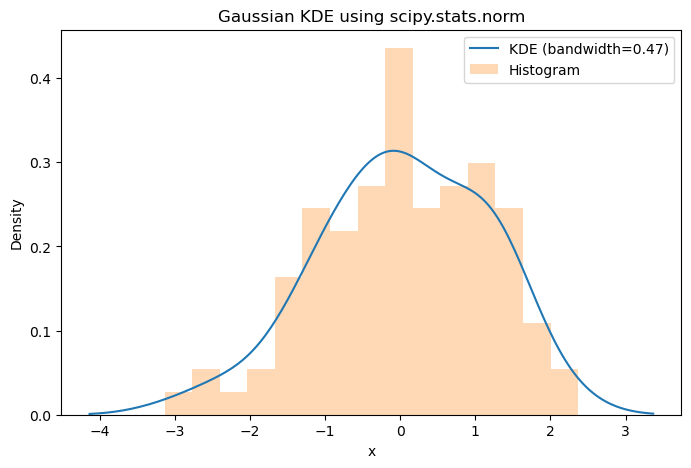

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example data
N = 100
mu = 0
sigma = 1
x = np.random.normal(mu, sigma, N)

# 1. Compute default bandwidth
h_default = 1.06 * x.std() * x.size**(-1/5)

# 2. Function to compute KDE
def kde_gaussian(x_data, x_eval, bandwidth=None):
    if bandwidth is None:
        bandwidth = 1.06 * x_data.std() * x_data.size**(-1/5)  # default
    
    kde_values = np.zeros_like(x_eval)
    
    # Add a Gaussian for each data point
    for xi in x_data:
        kde_values += norm.pdf(x_eval, loc=xi, scale=bandwidth)  # Gaussian centered at xi
    
    kde_values /= x_data.size  # average over all points
    return kde_values, bandwidth

# 3. Define points to evaluate the KDE
x_eval = np.linspace(x.min()-1, x.max()+1, 200)

# 4. Compute KDE
kde_values, h_used = kde_gaussian(x, x_eval)

# 5. Plot
plt.figure(figsize=(8,5))
plt.plot(x_eval, kde_values, label=f'KDE (bandwidth={h_used:.2f})')
plt.hist(x, bins=15, density=True, alpha=0.3, label='Histogram')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Gaussian KDE using scipy.stats.norm')
plt.legend()
plt.show()


# 2 Color-coded scatter plot

Produce a scatter plot out of a dataset with two categories:

Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)

Display the dataset in a scatter plot marking the two categories with different marker colors.

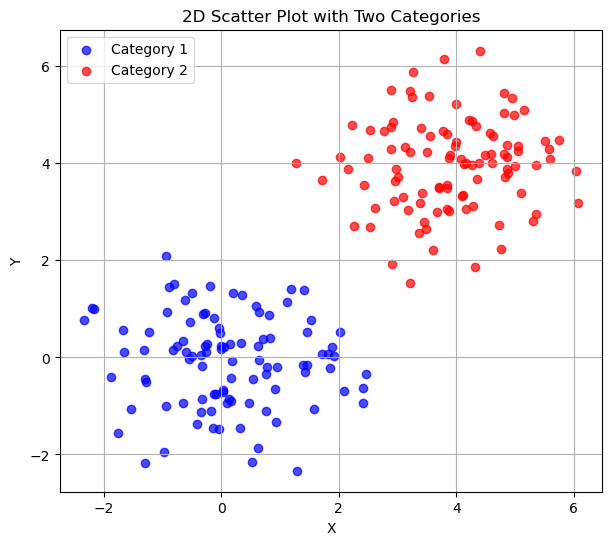

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate 2D dataset with two categories
def generate_2d_data(N=100, 
                     mean1=(0,0), std1=(1,1), 
                     mean2=(3,3), std2=(1,1)):
    """
    N       : number of points per category
    mean1   : mean of category 1 (x,y)
    std1    : standard deviation of category 1 (x,y)
    mean2   : mean of category 2 (x,y)
    std2    : standard deviation of category 2 (x,y)
    """
    # Category 1
    x1 = np.random.normal(mean1[0], std1[0], N)
    y1 = np.random.normal(mean1[1], std1[1], N)
    
    # Category 2
    x2 = np.random.normal(mean2[0], std2[0], N)
    y2 = np.random.normal(mean2[1], std2[1], N)
    
    return (x1, y1), (x2, y2)

# Generate dataset
cat1, cat2 = generate_2d_data(N=100, mean1=(0,0), std1=(1,1), mean2=(4,4), std2=(1,1))

# Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(cat1[0], cat1[1], color='blue', alpha=0.7, label='Category 1')
plt.scatter(cat2[0], cat2[1], color='red', alpha=0.7, label='Category 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scatter Plot with Two Categories')
plt.legend()
plt.grid(True)
plt.show()


# 3. Profile plot

Produce a profile plot from a scatter plot.

Download the following dataset and load it as a pandas dataframe:

Inspect the dataset, you'll find two variables (features)
Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

In [3]:
import numpy as np
import pandas as pd

# 1. Load the .npy file
data = np.load('residuals_261.npy', allow_pickle=True)

# 2. The loaded object is a numpy array with a dictionary inside
data_dict = data.item()

# 3. Convert to pandas DataFrame
df = pd.DataFrame(data_dict)

# 4. Inspect the DataFrame
#print(df.head())


In [5]:
#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

df_clean = df[np.abs(df['residuals']) < 2]

# Check the number of remaining rows
print(f"Original number of rows: {len(df['residuals'])}")
print(f"Cleaned number of rows: {len(df_clean)}")


Original number of rows: 11131
Cleaned number of rows: 10489


PERFORM A LINEAR REGRESSION OF "RESIDUALS" VERSUS "DISTANCES" USING SCIPY.STATS.LINREGRESS()



/var/folders/bp/cy49vmhn5sx1kw5gcmr0kvp00000gn/T/ipykernel_83842/1525814171.py:2: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.stats as stats


Slope: 0.0401
Intercept: -1.0082
R-squared: 0.0032
P-value: 2.2959e-09
Std error of slope: 0.0067


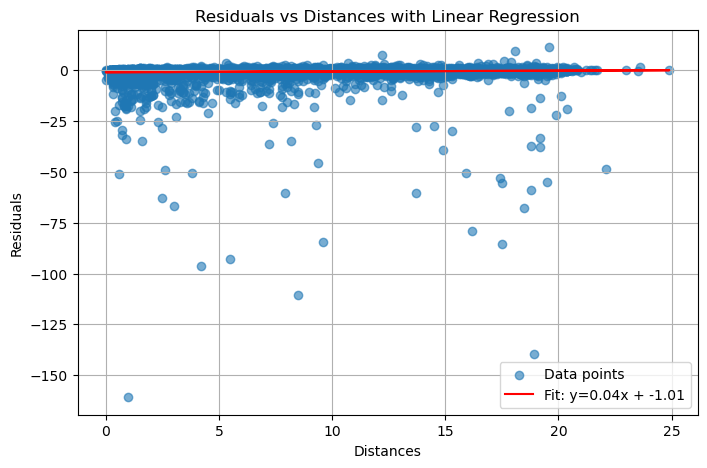

In [6]:
# Assuming the cleaned dataset is df_clean
import scipy.stats as stats

x = df['distances']   # independent variable
y = df['residuals']    # dependent variable

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Std error of slope: {std_err:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.6, label='Data points')
plt.plot(x, intercept + slope*x, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Residuals vs Distances with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



In [1]:
import seaborn as sns
%matplotlib inline


# Assuming df_clean is the cleaned DataFrame
sns.set(style="whitegrid")

# Jointplot with regression
jp = sns.jointplot(
    data=df_clean,
    x="distances",
    y="residual",
    kind="reg",       # scatter + regression line
    height=7,         # size of the plot
    scatter_kws={'alpha':0.6}  # make points slightly transparent
)

# Add titles
jp.fig.suptitle('Jointplot of Residuals vs Distances with Linear Regression', y=1.02)
jp.set_axis_labels('Distances', 'Residuals')

plt.show()


ModuleNotFoundError: No module named 'seaborn'

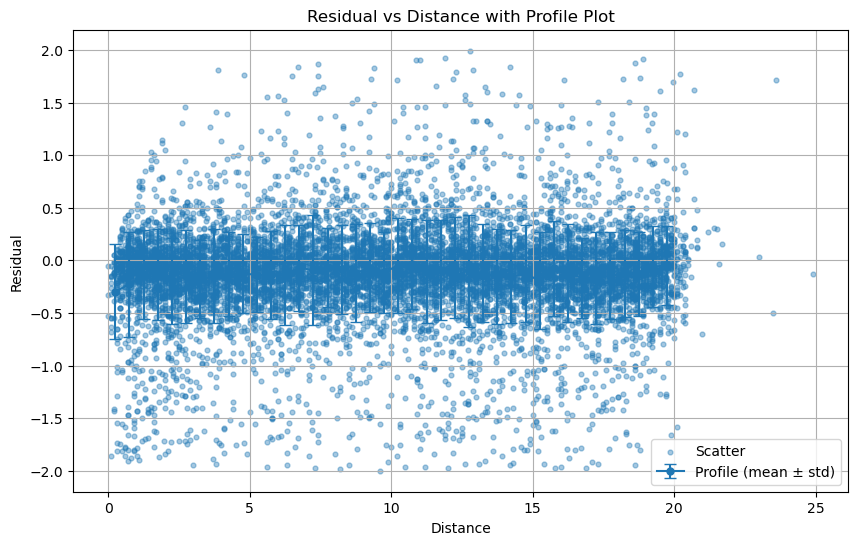

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- assuming df_clean already exists and contains columns: "distances" and "residual" ---

# Extract the data
dist = df_clean["distances"].values
res  = df_clean["residuals"].values

# 1. Define bins
bins = np.linspace(0, 20, 41)   # 40 bins between 0 and 20

# Bin centers (this will be your x array)
x = 0.5 * (bins[:-1] + bins[1:])

# 2. Compute mean residual in each bin → y array
y = np.array([res[(dist >= bins[i]) & (dist < bins[i+1])].mean()
              for i in range(len(bins) - 1)])

# 3. Compute std of residual in each bin → erry array
erry = np.array([res[(dist >= bins[i]) & (dist < bins[i+1])].std()
                 for i in range(len(bins) - 1)])

# Remove bins with no data (NaNs)
mask = ~np.isnan(y)
x = x[mask]
y = y[mask]
erry = erry[mask]

# --- PLOTTING ---
plt.figure(figsize=(10, 6))

# Scatter plot of all points
plt.scatter(dist, res, s=12, alpha=0.4, label="Scatter", rasterized=True)

# Profile plot (mean residual per bin)
plt.errorbar(
    x, y, yerr=erry,
    fmt='o-', markersize=5, capsize=4, label="Profile (mean ± std)"
)

plt.xlabel("Distance")
plt.ylabel("Residual")
plt.title("Residual vs Distance with Profile Plot")
plt.legend()
plt.grid(True)

plt.show()


# 8

# 1. PCA on 3D dataset


Covariance matrix:
 [[ 0.97520967  0.88479076  2.83521009]
 [ 0.88479076  9.23882008 11.0084016 ]
 [ 2.83521009 11.0084016  16.67882177]]

Eigenvalues (cov-eig): [2.49113625e+01 1.98148904e+00 3.52801205e-15]
Eigenvectors (columns):
 [[-0.1171539   0.5653391   0.81649658]
 [-0.57524227 -0.70882273  0.40824829]
 [-0.80955006  0.42185547 -0.40824829]]

Explained variance ratio: [9.26319117e-01 7.36808828e-02 1.31187727e-16]
Cumulative explained: [0.92631912 1.         1.        ]

#PCs for >= 99% variance: 2

Eigenvalues (from SVD): [2.49113625e+01 1.98148904e+00 3.66931434e-31]

Max abs difference in eigenvalues: 3.5280120546815743e-15
Abs dot products between eigenvectors (cov-eig vs SVD): [np.float64(1.0000000000000004), np.float64(0.9999999999999999), np.float64(0.9999999999999996)]


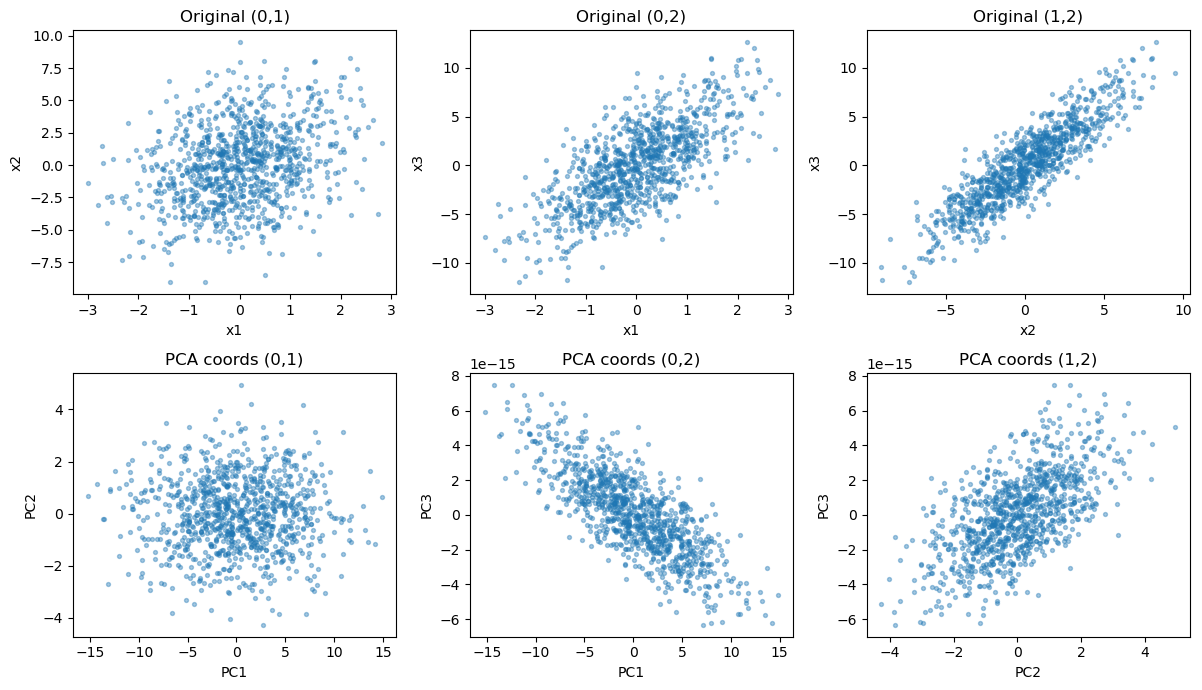

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Generate the dataset
# -----------------------------
np.random.seed(0)
N = 1000

x1 = np.random.normal(loc=0.0, scale=1.0, size=N)
noise = np.random.normal(loc=0.0, scale=3.0, size=N)   # std = 3
x2 = x1 + noise
x3 = 2*x1 + x2

X = np.column_stack([x1, x2, x3])   # shape (N, 3)

# Center the data (PCA always uses centered data)
Xc = X - X.mean(axis=0)

# -----------------------------
# 2) PCA via covariance eigendecomposition
# -----------------------------
# Cov = Xc^T Xc / (N-1)
Cov = (Xc.T @ Xc) / (N - 1)

# eigh because Cov is symmetric; it returns eigenvalues ascending
eigvals, eigvecs = np.linalg.eigh(Cov)

# Sort descending (largest eigenvalue = PC1)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]  # columns are eigenvectors (PC directions)

print("Covariance matrix:\n", Cov)
print("\nEigenvalues (cov-eig):", eigvals)
print("Eigenvectors (columns):\n", eigvecs)

# Explained variance ratio
explained = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained)

print("\nExplained variance ratio:", explained)
print("Cumulative explained:", cum_explained)

# How many PCs to retain at least 99%?
k_99 = np.searchsorted(cum_explained, 0.99) + 1
print("\n#PCs for >= 99% variance:", k_99)

# Project data into PCA basis (scores)
Z = Xc @ eigvecs  # shape (N, 3), coordinates in PC basis

# Reduced representation (keep first k_99 PCs)
Z_reduced = Z[:, :k_99]

# -----------------------------
# 3) PCA via SVD and check equivalence
# -----------------------------
# SVD of centered data matrix: Xc = U S V^T
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
V = Vt.T  # columns of V are right-singular vectors (PC directions)

# Eigenvalues of covariance from SVD:
eigvals_svd = (S**2) / (N - 1)

print("\nEigenvalues (from SVD):", eigvals_svd)

# Compare eigenvalues (should match)
print("\nMax abs difference in eigenvalues:",
      np.max(np.abs(eigvals - eigvals_svd)))

# Compare eigenvectors up to sign (a PC direction can flip sign)
# We'll compute absolute dot products between corresponding vectors:
dots = [abs(np.dot(eigvecs[:, i], V[:, i])) for i in range(3)]
print("Abs dot products between eigenvectors (cov-eig vs SVD):", dots)

# -----------------------------
# 4) Plot: original coords vs PCA coords
# -----------------------------
pairs = [(0, 1), (0, 2), (1, 2)]
pair_titles = ["(0,1)", "(0,2)", "(1,2)"]

fig, axes = plt.subplots(2, 3, figsize=(12, 7))

# Top row: original coordinates
for j, (a, b) in enumerate(pairs):
    ax = axes[0, j]
    ax.scatter(Xc[:, a], Xc[:, b], s=8, alpha=0.4)
    ax.set_title(f"Original {pair_titles[j]}")
    ax.set_xlabel(f"x{a+1}")
    ax.set_ylabel(f"x{b+1}")

# Bottom row: PCA coordinates (PC scores)
for j, (a, b) in enumerate(pairs):
    ax = axes[1, j]
    ax.scatter(Z[:, a], Z[:, b], s=8, alpha=0.4)
    ax.set_title(f"PCA coords {pair_titles[j]}")
    ax.set_xlabel(f"PC{a+1}")
    ax.set_ylabel(f"PC{b+1}")

plt.tight_layout()
plt.show()


# 2. 


In [2]:
import numpy as np

def pca_cov(X):
    """PCA via covariance eigendecomposition. Returns (eigvals, eigvecs, explained, cum)."""
    Xc = X - X.mean(axis=0)
    Cov = (Xc.T @ Xc) / (Xc.shape[0] - 1)
    eigvals, eigvecs = np.linalg.eigh(Cov)          # ascending
    idx = np.argsort(eigvals)[::-1]                 # descending
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]                       # columns = PCs
    explained = eigvals / eigvals.sum()
    cum = np.cumsum(explained)
    return eigvals, eigvecs, explained, cum

# -----------------------------
# 0) Old PCA (3D signal)
# -----------------------------
eigvals_old, eigvecs_old, exp_old, cum_old = pca_cov(X)

print("OLD (3D) explained variance:", exp_old)
print("OLD cumulative:", cum_old)

# -----------------------------
# 1) Add 10 uncorrelated small-noise variables
# -----------------------------
N = X.shape[0]
noise_std = 3.0 / 50.0   # "factor 50 smaller than those used to generate x2 noise (std=3)"
Noise = np.random.normal(loc=0.0, scale=noise_std, size=(N, 10))

X13 = np.hstack([X, Noise])   # shape (N, 13)

# -----------------------------
# 2) New PCA (13D)
# -----------------------------
eigvals_new, eigvecs_new, exp_new, cum_new = pca_cov(X13)

print("\nNEW (13D) explained variance (first 12):", exp_new[:12])
print("NEW cumulative (first 12):", cum_new[:12])

k99_old = np.searchsorted(cum_old, 0.99) + 1
k99_new = np.searchsorted(cum_new, 0.99) + 1
print("\n#PCs for >=99%: old =", k99_old, "new =", k99_new)

# -----------------------------
# 3) Compare: do PCs 1-2 stay the same (on the signal coordinates)?
# -----------------------------
# Look at the first 3 entries (x1,x2,x3 loadings) of the new PC vectors
# and compare them to the old PC vectors (sign is arbitrary, so use abs dot).
def unit(v):
    return v / np.linalg.norm(v)

for i in range(2):
    old_dir = eigvecs_old[:, i]               # (3,)
    new_dir_signal_part = eigvecs_new[:3, i]  # (3,)
    # normalize the signal-part to compare direction
    sim = abs(np.dot(unit(old_dir), unit(new_dir_signal_part)))
    print(f"\nSimilarity of PC{i+1} directions (old vs new, signal-part): {sim:.6f}")

# -----------------------------
# 4) Noise eigenvalues check (should be ~ noise_std^2)
# -----------------------------
print("\nExpected noise variance:", noise_std**2)
print("Smallest 10 eigenvalues (should cluster near noise var):")
print(np.sort(eigvals_new)[0:10])


OLD (3D) explained variance: [9.26319117e-01 7.36808828e-02 1.31187727e-16]
OLD cumulative: [0.92631912 1.         1.        ]

NEW (13D) explained variance (first 12): [9.25099576e-01 7.35847845e-02 1.54559755e-04 1.48713392e-04
 1.46591571e-04 1.34436663e-04 1.33682803e-04 1.30719795e-04
 1.27298604e-04 1.21349967e-04 1.13834224e-04 1.04452547e-04]
NEW cumulative (first 12): [0.92509958 0.99868436 0.99883892 0.99898763 0.99913423 0.99926866
 0.99940234 0.99953306 0.99966036 0.99978171 0.99989555 1.        ]

#PCs for >=99%: old = 2 new = 2

Similarity of PC1 directions (old vs new, signal-part): 1.000000

Similarity of PC2 directions (old vs new, signal-part): 1.000000

Expected noise variance: 0.0036
Smallest 10 eigenvalues (should cluster near noise var):
[4.23108459e-15 2.81273538e-03 3.06536853e-03 3.26775513e-03
 3.42794216e-03 3.52006920e-03 3.59985812e-03 3.62015834e-03
 3.94747005e-03 4.00460718e-03]


In [4]:
import numpy as np

# -----------------------------
# Settings
# -----------------------------
np.random.seed(0)
N = 1000          # number of time samples
n_cam = 12        # number of cameras
A = 5.0           # oscillation amplitude
omega = 2*np.pi/200
sigma_y = 0.2     # small noise along y

# -----------------------------
# 1) Simulate spring motion in lab frame
# -----------------------------
t = np.arange(N)
x = A * np.cos(omega * t)
y = np.random.normal(0.0, sigma_y, size=N)
z = np.zeros(N)

P = np.column_stack([x, y, z])  # shape (N,3)

# -----------------------------
# 2) Camera directions (theta, phi) and projections
# -----------------------------
# random camera angles
theta = np.random.uniform(0.1, np.pi-0.1, size=n_cam)     # avoid exactly 0,pi
phi   = np.random.uniform(0.0, 2*np.pi, size=n_cam)

# viewing unit vectors v_i
V = np.column_stack([
    np.sin(theta)*np.cos(phi),
    np.sin(theta)*np.sin(phi),
    np.cos(theta)
])  # shape (n_cam,3)

# measurements: m_i(t) = p(t) dot v_i
M = P @ V.T   # shape (N, n_cam)

# Center measurements (PCA)
Mc = M - M.mean(axis=0)

# -----------------------------
# 3) PCA via SVD
# -----------------------------
U, S, Vt = np.linalg.svd(Mc, full_matrices=False)
eigvals = (S**2) / (N - 1)
explained = eigvals / eigvals.sum()
cum = np.cumsum(explained)

print("Explained variance ratios (first 10):", explained[:10])
print("Cumulative (first 10):", cum[:10])
print("PCs needed for >=99% variance:", np.searchsorted(cum, 0.99) + 1)

# PC1 time series (scores) = first column of U*S
pc1_scores = U[:, 0] * S[0]

# Correlation with true x(t) (up to sign)
corr = np.corrcoef(pc1_scores, x)[0, 1]
print("corr(PC1, true x) =", corr, "(sign can flip)")


Explained variance ratios (first 10): [9.98720588e-01 1.27941200e-03 8.64963939e-32 5.59779918e-33
 7.33330251e-34 4.65367669e-34 3.18381586e-34 8.76577473e-35
 7.67988003e-35 4.78171801e-35]
Cumulative (first 10): [0.99872059 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
PCs needed for >=99% variance: 1
corr(PC1, true x) = -0.9999634281263684 (sign can flip)


# 9

# 1

In [2]:
import numpy as np
from scipy.interpolate import UnivariateSpline

# load data
max_speeds = np.load('max-speeds.npy')
N = max_speeds.shape[0]

# sort annual maxima
sorted_speeds = np.sort(max_speeds)

# cumulative probabilities
cprob = np.arange(1, N + 1) / (N + 1)

# quantile function: inverse CDF
quantile_func = UnivariateSpline(cprob, sorted_speeds, k=3, s=0)

# 50-year return level = upper 2% quantile
fifty_prob = 1.0 - 0.02
fifty_wind = quantile_func(fifty_prob)

print(f"50-year maximum wind speed ≈ {fifty_wind:.2f}")


50-year maximum wind speed ≈ 36.97


# 2

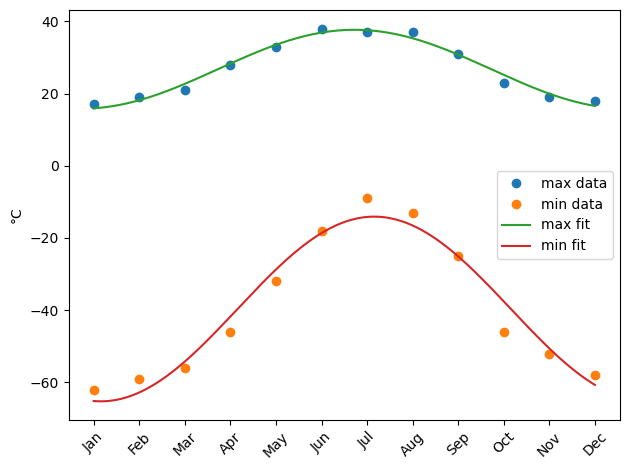

Max fit: A, phi, C = [10.93254953  2.72348005 26.75      ]
Min fit: A, phi, C = [ 25.58169521   3.15603649 -39.66666667]
phi_max - phi_min = -0.43255643510071273 +/- 0.16690840656009645


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t = np.arange(12)  # months 0..11

tmax = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18], dtype=float)
tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58], dtype=float)

def seasonal(t, A, phi, C):
    # period = 12 months
    return A*np.sin(2*np.pi*(t - phi)/12) + C

# decent initial guesses
p0_max = [(tmax.max()-tmax.min())/2, 3.0, tmax.mean()]
p0_min = [(tmin.max()-tmin.min())/2, 3.0, tmin.mean()]

pmax, covmax = curve_fit(seasonal, t, tmax, p0=p0_max)
pmin, covmin = curve_fit(seasonal, t, tmin, p0=p0_min)

Amax, phimax, Cmax = pmax
Amin, phimin, Cmin = pmin

tfine = np.linspace(0, 11, 400)

plt.figure()
plt.plot(t, tmax, "o", label="max data")
plt.plot(t, tmin, "o", label="min data")
plt.plot(tfine, seasonal(tfine, *pmax), "-", label="max fit")
plt.plot(tfine, seasonal(tfine, *pmin), "-", label="min fit")
plt.xticks(t, ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=45)
plt.ylabel("°C")
plt.legend()
plt.tight_layout()
plt.show()

print("Max fit: A, phi, C =", pmax)
print("Min fit: A, phi, C =", pmin)

# compare time offset (phase) with 1-sigma uncertainties
sig_phimax = np.sqrt(covmax[1,1])
sig_phimin = np.sqrt(covmin[1,1])
print("phi_max - phi_min =", phimax - phimin, "+/-", np.sqrt(sig_phimax**2 + sig_phimin**2))


# 3

In [7]:
import numpy as np
from scipy.optimize import minimize

def f(xy):
    x, y = xy
    return (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y + (4*y**2 - 4)*y**2

# multi-start search inside bounds
bounds = [(-2, 2), (-1, 1)]

# coarse grid seeds
xs = np.linspace(-2, 2, 41)
ys = np.linspace(-1, 1, 41)

seeds = []
for x in xs:
    for y in ys:
        seeds.append((x, y))

sols = []
for s in seeds:
    res = minimize(f, x0=np.array(s), bounds=bounds, method="L-BFGS-B")
    if res.success:
        sols.append((res.x[0], res.x[1], res.fun))

# cluster unique minima (simple rounding)
uniq = {}
for x, y, val in sols:
    key = (round(x, 4), round(y, 4))
    uniq[key] = min(val, uniq.get(key, 1e9))

# print best few
best = sorted([(k[0], k[1], v) for k, v in uniq.items()], key=lambda r: r[2])[:10]
for row in best:
    print(row)

# what happens from (0,0)?
res00 = minimize(f, x0=np.array([0.0, 0.0]), bounds=bounds, method="L-BFGS-B")
print("start (0,0) ->", res00.x, res00.fun, "success:", res00.success)


(np.float64(0.0898), np.float64(-0.7127), np.float64(-1.0316284534898774))
(np.float64(-0.0898), np.float64(0.7127), np.float64(-1.0316284534898774))
(np.float64(-1.7036), np.float64(0.7961), np.float64(-0.21546382438372047))
(np.float64(1.7036), np.float64(-0.7961), np.float64(-0.21546382438371925))
(np.float64(-0.1262), np.float64(0.2459), np.float64(-0.19518981462360557))
(np.float64(0.1262), np.float64(-0.2459), np.float64(-0.1951897625518827))
(np.float64(0.1052), np.float64(-0.1879), np.float64(-0.11201648970214945))
(np.float64(-0.1052), np.float64(0.1879), np.float64(-0.11201647870715996))
(np.float64(0.0), np.float64(0.0), np.float64(0.0))
(np.float64(1.6071), np.float64(0.5687), np.float64(2.1042503103112566))
start (0,0) -> [0. 0.] 0.0 success: True


# 4

Hares dominant period ≈ 10.5 years
Lynxes dominant period ≈ 10.5 years


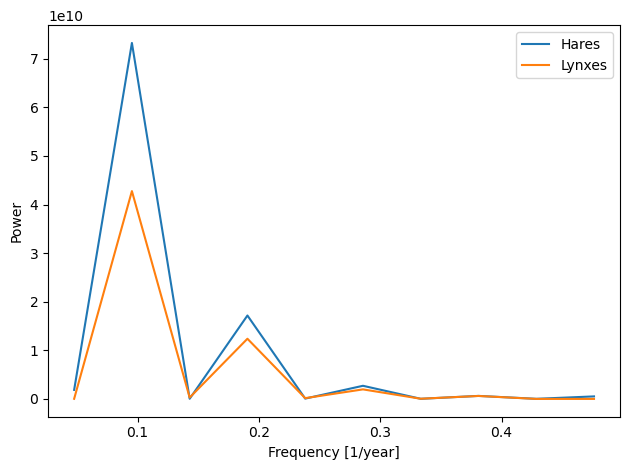

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# load data (same file as before)
data = np.loadtxt("populations.txt")
years  = data[:, 0]
hares  = data[:, 1]
lynxes = data[:, 2]

dt = years[1] - years[0]          # sampling = 1 year
N  = len(years)

# remove mean (important)
hares_d  = hares  - hares.mean()
lynxes_d = lynxes - lynxes.mean()

# FFT
H = np.fft.rfft(hares_d)
L = np.fft.rfft(lynxes_d)
freq = np.fft.rfftfreq(N, d=dt)

# power spectra
Ph = np.abs(H)**2
Pl = np.abs(L)**2

# dominant periods (ignore zero freq)
idx_h = np.argmax(Ph[1:]) + 1
idx_l = np.argmax(Pl[1:]) + 1

period_hares  = 1 / freq[idx_h]
period_lynxes = 1 / freq[idx_l]

print(f"Hares dominant period ≈ {period_hares:.1f} years")
print(f"Lynxes dominant period ≈ {period_lynxes:.1f} years")

# plot
plt.figure()
plt.plot(freq[1:], Ph[1:], label="Hares")
plt.plot(freq[1:], Pl[1:], label="Lynxes")
plt.xlabel("Frequency [1/year]")
plt.ylabel("Power")
plt.legend()
plt.tight_layout()
plt.show()


# 10

# 1

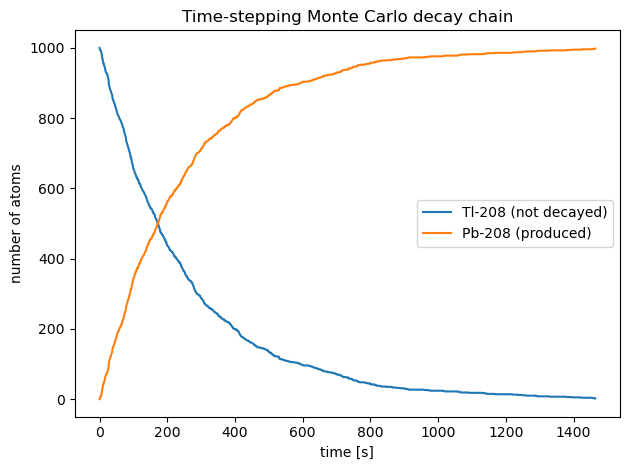

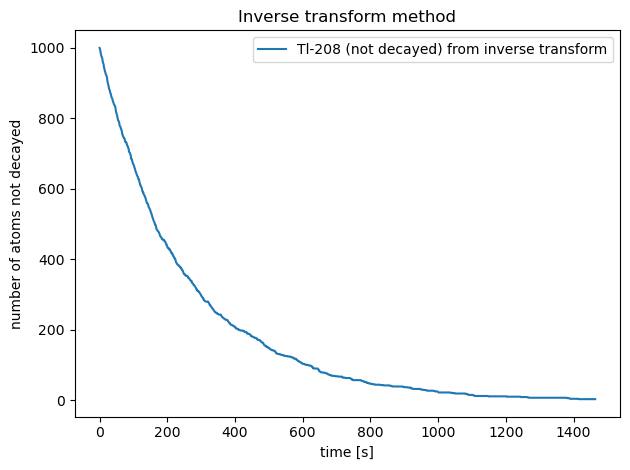

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
N0 = 1000
half_life_min = 3.052
tau = half_life_min * 60.0   # half-life in seconds
dt = 1.0                     # 1 second time step

# choose how long to simulate (e.g. ~8 half-lives)
t_max = int(8 * tau)
t = np.arange(0, t_max + 1, int(dt))

# -----------------------------
# 1) Time-stepping simulation
# -----------------------------
# Probability that an atom decays within one step dt:
p_step = 1.0 - 2.0**(-dt / tau)

Tl = np.zeros_like(t, dtype=int)
Pb = np.zeros_like(t, dtype=int)

n_tl = N0
n_pb = 0

Tl[0] = n_tl
Pb[0] = n_pb

rng = np.random.default_rng(0)

for i in range(1, len(t)):
    if n_tl == 0:
        Tl[i:] = 0
        Pb[i:] = N0
        break

    # number of decays in this dt among the remaining Tl atoms
    decays = rng.binomial(n=n_tl, p=p_step)

    n_tl -= decays
    n_pb += decays

    Tl[i] = n_tl
    Pb[i] = n_pb

plt.figure()
plt.plot(t, Tl, label="Tl-208 (not decayed)")
plt.plot(t, Pb, label="Pb-208 (produced)")
plt.xlabel("time [s]")
plt.ylabel("number of atoms")
plt.title("Time-stepping Monte Carlo decay chain")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 2) Inverse transform method
# -----------------------------
# Decay time distribution is exponential with rate lambda = ln(2)/tau
# Inverse CDF: T = -(1/lambda) * ln(1-U) = (tau/ln2) * ln(1/(1-U))
U = rng.random(N0)
decay_times = -(tau / np.log(2.0)) * np.log(1.0 - U)   # seconds

# number not decayed at each time t: count(decay_times > t)
not_decayed = np.array([(decay_times > ti).sum() for ti in t])

plt.figure()
plt.plot(t, not_decayed, label="Tl-208 (not decayed) from inverse transform")
plt.xlabel("time [s]")
plt.ylabel("number of atoms not decayed")
plt.title("Inverse transform method")
plt.legend()
plt.tight_layout()
plt.show()


# 2

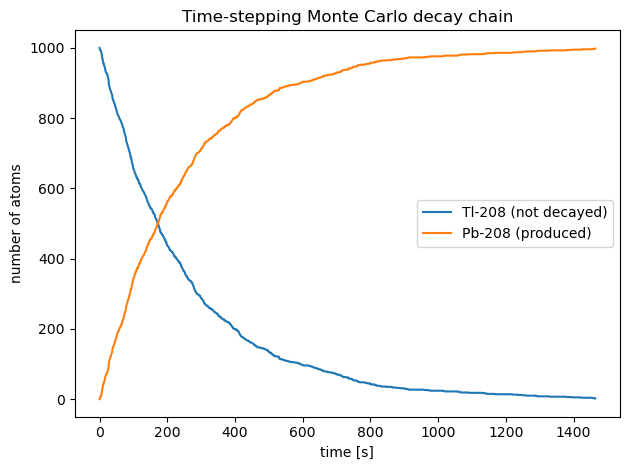

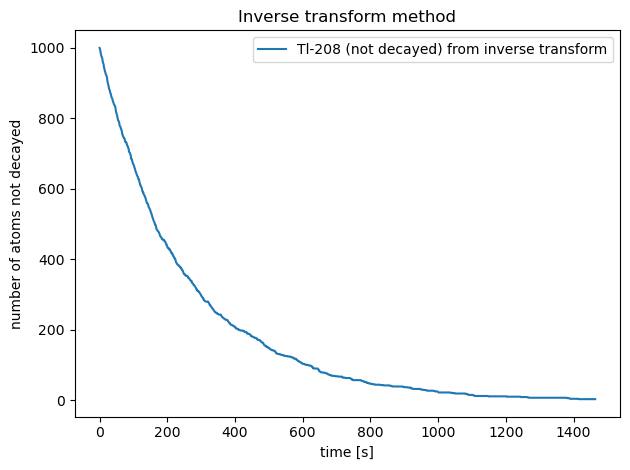

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
N0 = 1000
half_life_min = 3.052
tau = half_life_min * 60.0   # half-life in seconds
dt = 1.0                     # 1 second time step

# choose how long to simulate (e.g. ~8 half-lives)
t_max = int(8 * tau)
t = np.arange(0, t_max + 1, int(dt))

# -----------------------------
# 1) Time-stepping simulation
# -----------------------------
# Probability that an atom decays within one step dt:
p_step = 1.0 - 2.0**(-dt / tau)

Tl = np.zeros_like(t, dtype=int)
Pb = np.zeros_like(t, dtype=int)

n_tl = N0
n_pb = 0

Tl[0] = n_tl
Pb[0] = n_pb

rng = np.random.default_rng(0)

for i in range(1, len(t)):
    if n_tl == 0:
        Tl[i:] = 0
        Pb[i:] = N0
        break

    # number of decays in this dt among the remaining Tl atoms
    decays = rng.binomial(n=n_tl, p=p_step)

    n_tl -= decays
    n_pb += decays

    Tl[i] = n_tl
    Pb[i] = n_pb

plt.figure()
plt.plot(t, Tl, label="Tl-208 (not decayed)")
plt.plot(t, Pb, label="Pb-208 (produced)")
plt.xlabel("time [s]")
plt.ylabel("number of atoms")
plt.title("Time-stepping Monte Carlo decay chain")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 2) Inverse transform method
# -----------------------------
# Decay time distribution is exponential with rate lambda = ln(2)/tau
# Inverse CDF: T = -(1/lambda) * ln(1-U) = (tau/ln2) * ln(1/(1-U))
U = rng.random(N0)
decay_times = -(tau / np.log(2.0)) * np.log(1.0 - U)   # seconds

# number not decayed at each time t: count(decay_times > t)
not_decayed = np.array([(decay_times > ti).sum() for ti in t])

plt.figure()
plt.plot(t, not_decayed, label="Tl-208 (not decayed) from inverse transform")
plt.xlabel("time [s]")
plt.ylabel("number of atoms not decayed")
plt.title("Inverse transform method")
plt.legend()
plt.tight_layout()
plt.show()


# 3


In [4]:
I_ref = 1.41815   # stable to ~1e-4

import numpy as np
import math

def f(x):
    return np.sin(x)**2 / (x*(2-x))

N = 200_000
rng = np.random.default_rng(0)

# bounding box
x_min, x_max = 0.0, 2.0
f_max = 3.0   # safe upper bound

x = rng.uniform(x_min, x_max, N)
y = rng.uniform(0.0, f_max, N)

hits = y < f(x)
I_hitmiss = (x_max - x_min) * f_max * np.mean(hits)

err_hitmiss = abs(I_hitmiss - I_ref)

print("Hit/Miss integral =", I_hitmiss)
print("Hit/Miss error    =", err_hitmiss)


x = rng.uniform(0.0, 2.0, N)
fx = f(x)

I_mean = (2.0 - 0.0) * np.mean(fx)
err_mean = abs(I_mean - I_ref)

print("Mean value integral =", I_mean)
print("Mean value error    =", err_mean)


Hit/Miss integral = 1.9341599999999999
Hit/Miss error    = 0.5160099999999999
Mean value integral = 6.446206917244878
Mean value error    = 5.028056917244879


# 4

In [5]:
import numpy as np
import math

def mc_unit_ball_volume(dim, N=1_000_000, seed=0):
    rng = np.random.default_rng(seed)
    X = rng.uniform(-1.0, 1.0, size=(N, dim))
    r2 = np.sum(X**2, axis=1)
    hits = (r2 <= 1.0)
    p = hits.mean()

    V = (2.0**dim) * p  # volume of [-1,1]^dim is 2^dim

    # standard error from binomial on p
    se_p = math.sqrt(p*(1-p)/N)
    se_V = (2.0**dim) * se_p
    return V, se_V

# ---- 2D circle area ----
A2, se2 = mc_unit_ball_volume(dim=2, N=300_000, seed=0)
print(f"Area (MC) = {A2:.6f} ± {se2:.6f}   (true = {math.pi:.6f})")


Area (MC) = 3.142053 ± 0.002998   (true = 3.141593)


In [6]:
V10, se10 = mc_unit_ball_volume(dim=10, N=2_000_000, seed=1)
print(f"V_10 (MC) = {V10:.8f} ± {se10:.8f}")
print(f"True V_10 = {math.pi**5 / math.factorial(5):.8f}")


V_10 (MC) = 2.58918400 ± 0.03636358
True V_10 = 2.55016404
